Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


c:\Users\spadm\anaconda3\envs\cheque_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9344 - loss: 0.2186 - val_accuracy: 0.9817 - val_loss: 0.0617
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9874 - loss: 0.0409 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9898 - val_loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9903 - loss: 0.0277
Test Accuracy: 0.9902999997138977


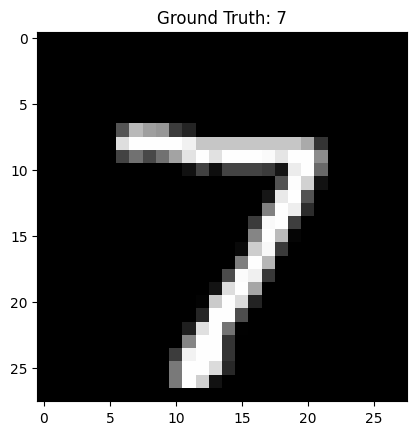

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Predicted: 7
Model saved successfully!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)
# Reshape for CNN input and normalize
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test = x_test.reshape(-1,28,28,1) / 255.0
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
sample_index = 0
plt.imshow(x_test[sample_index].reshape(28,28), cmap='gray')
plt.title("Ground Truth: " + str(np.argmax(y_test[sample_index])))
plt.show()

pred = model.predict(x_test[sample_index].reshape(1,28,28,1))
print("Predicted:", np.argmax(pred))
model.save("models/cheque_digit_cnn_model.h5")
print("Digit CNN model saved successfully!")
